# Establecer Informacion
Definir herramientas y datos con los cuales trabajaremos

In [78]:
# Importar biblotecas
import pandas as pd
import matplotlib.pyplot as plt

# Crear el dataframe
data = {
    'Nombre': ['Fer', 'Ale', 'Alex', 'Gael', 'Erick', 'Angie', 'Karla', 'Angel', 'Derik', 'Jacal', 'Leo', 'Lalo', 'Antonio', 'Luis', 'Cristian', 'Juve'],
    'Altura (cm)': [180, 170, 170, 168, 165, 168, 170, 175, 174, 175, 171, 172, 170, 177, 170, 176],
    'Sexo': ['M', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']
}
df = pd.DataFrame(data)

# Grafica de visualizacion
Un scatter para ver todos los datos, comprobar valores y asegurarnos de que no hay anomalías

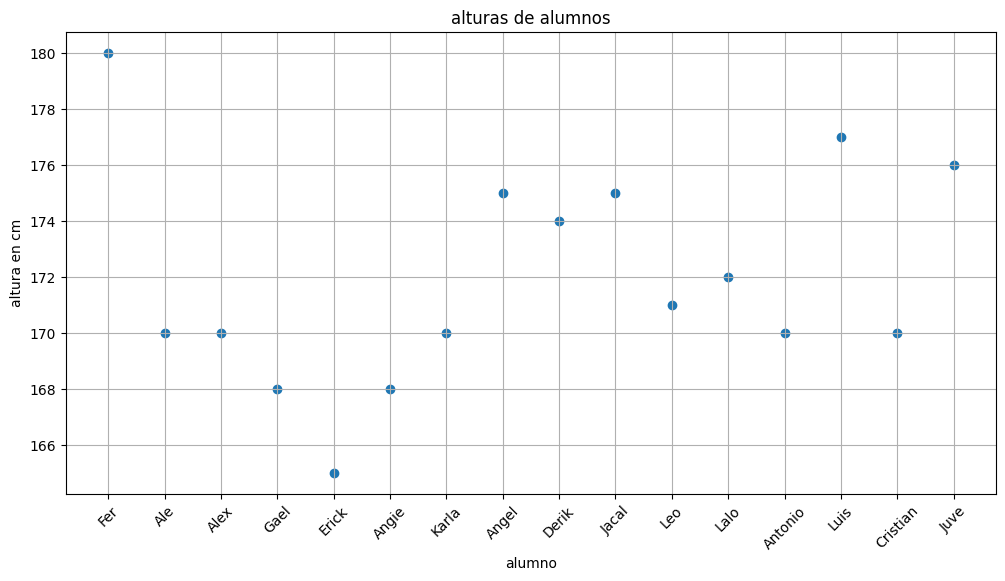

In [79]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Nombre'], df['Altura (cm)'])
plt.title('alturas de alumnos')
plt.xlabel('alumno')
plt.ylabel('altura en cm')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Histograma de informacion
Visualizar frecuencia de las alturas para entender las tendencias

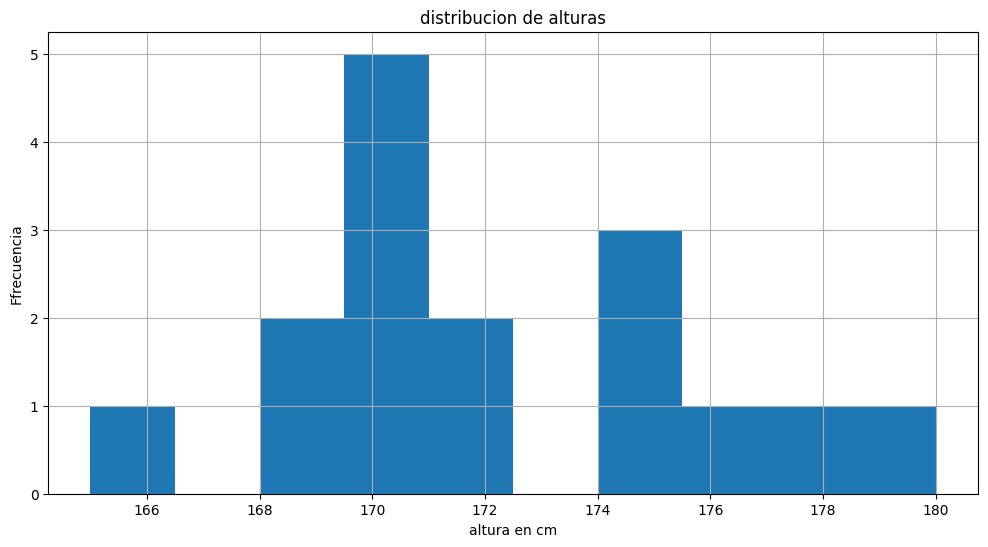

In [80]:
plt.figure(figsize=(12, 6))
plt.hist(df['Altura (cm)'])
plt.title('distribucion de alturas')
plt.xlabel('altura en cm')
plt.ylabel('Ffrecuencia')
plt.grid()
plt.show()

# Hipotesis:
valor de significancia: .05

### •¿Tienen las estudiantes de 9vo una estatura media diferente de 175 cm?
- H0 = la media es igual a 175cm
- H1 = la media es diferente 

In [81]:
altura_promedio = df['Altura (cm)'].mean()
print(f'altura promedio gral: {altura_promedio:.2f} cm')

altura promedio gral: 171.94 cm


t-student:
- u = media poblacional (175)
- x = media de la muestra
- s = desviacion standard de la muestra
- n = tamaño de la muestra

In [82]:
import scipy.stats as stats
u = 175
n = len(df)
x = altura_promedio
s = desviacion_estandar
t = (x - u) / (s / (n ** 0.5))
pvalue = 2 * (1 - stats.t.cdf(abs(t), df=n-1))
print(f'estadistica t: {t:.2f}, p-value: {pvalue:.4f}')


estadistica t: -3.14, p-value: 0.0068


Conclusion: RECHAZO la hipótesis nula.

### •¿Es la desviación estándar de su estatura igual a o menor que 10 cm?
- H0 = la desviacion standard es menor o igual a 10cm
- H1 = la desviacion standard es mayor a 10cm

In [83]:
desviacion_estandar = df['Altura (cm)'].std()
print(f'desviacion estandar: {desviacion_estandar:.2f} cm')

desviacion estandar: 3.91 cm


chi cuadrada:
- s = desviacion standard de la muestra
- o = desviacion standard hipotetica

In [84]:
o = 10
chi = (n - 1) * (s ** 2) / (o ** 2)
pvalue_chi = 1 - stats.chi2.cdf(chi, df=n-1)
print(f'estadistica chi cuadrada: {chi:.2f}, p-value: {pvalue_chi:.4f}')


estadistica chi cuadrada: 2.29, p-value: 0.9999


Conclusion: NO RECHAZO la hipotesis nula.

### •¿Es diferente la estatura promedio de las mujeres comparada con la de los hombres?
- H0 = las medias de H y M son iguales
- H1 = las medias de H y M son diferentes

In [85]:
altura_promedio_sexo = df.groupby('Sexo')['Altura (cm)'].mean()
print(altura_promedio_sexo)

Sexo
F    169.000000
M    172.357143
Name: Altura (cm), dtype: float64


t a 2 muestras:
- xm = media de la muestra masculina
- xh = media de la muestra femenina
- sm = desviacion standard muestra masculina
- sf = desviacion standard muestra femenina
- nm = tamaño de muestra masculina
- nf = tamaño de muestra femenina

In [86]:
df_m = df[df['Sexo'] == 'M']
df_f = df[df['Sexo'] == 'F']

xm = df_m['Altura (cm)'].mean()
xf = df_f['Altura (cm)'].mean()
sm = df_m['Altura (cm)'].std()
sf = df_f['Altura (cm)'].std()
nm = len(df_m)
nf = len(df_f)

t_sex = (xm - xf) / ((sm**2/nm + sf**2/nf) ** 0.5)
df_sexo = nm + nf - 2
pvalue_sexo = 2 * (1 - stats.t.cdf(abs(t_sex), df=df_sexo))

print(f'estadistica t (sexo): {t_sex:.2f}, p-value: {pvalue_sexo:.4f}')


estadistica t (sexo): 2.30, p-value: 0.0377


Conclusion: RECHAZO la hipótesis nula.